In [12]:
from helpers import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

sns.set_theme(style="white", font='JetBrains Mono', font_scale=0.9)

In [2]:
# Models init
knn = pickle.load(open('../database/modele/KNN.pkl', 'rb'))
xgb = pickle.load(open('../database/modele/XGBmodel.pkl', 'rb'))
random_forest = pickle.load(open('../database/modele/RandomForest.pkl', 'rb'))

/home/kodascii/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kodascii/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
df = pd.DataFrame(data=[], columns=['model', 'accuracy', 'recall', 'precision', 'f1_score', 'AUC'])
df.loc[len(df)] = calc_metrics('knn', knn)
df.loc[len(df)] = calc_metrics('xgboost', xgb)
df.loc[len(df)] = calc_metrics('random_forest', random_forest)
df[['accuracy', 'precision', 'recall', 'f1_score', 'AUC']] *= 100
df

,model,accuracy,recall,precision,f1_score,AUC
0,knn,99.215445,0.000000,100.000000,0.000000,52.849147
1,xgboost,99.986610,99.557522,98.746082,99.150142,99.997150
2,random_forest,99.976196,96.965866,100.000000,98.459564,99.988433


In [4]:
df_melted = df.melt(id_vars='model', var_name='metric', value_name='value')
df_melted

,model,metric,value
0,knn,accuracy,99.215445
1,xgboost,accuracy,99.986610
2,random_forest,accuracy,99.976196
3,knn,recall,0.000000
4,xgboost,recall,99.557522
5,random_forest,recall,96.965866
6,knn,precision,100.000000
7,xgboost,precision,98.746082
8,random_forest,precision,100.000000
9,knn,f1_score,0.000000


<Axes: xlabel='metric', ylabel='value'>

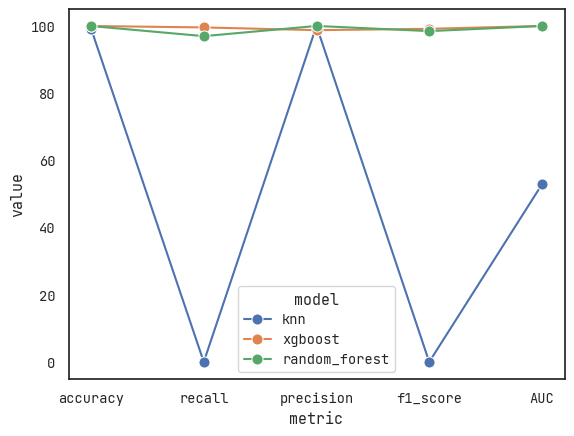

In [5]:
sns.lineplot(data=df_melted, x='metric', y='value', hue='model', marker='o', markersize=8)

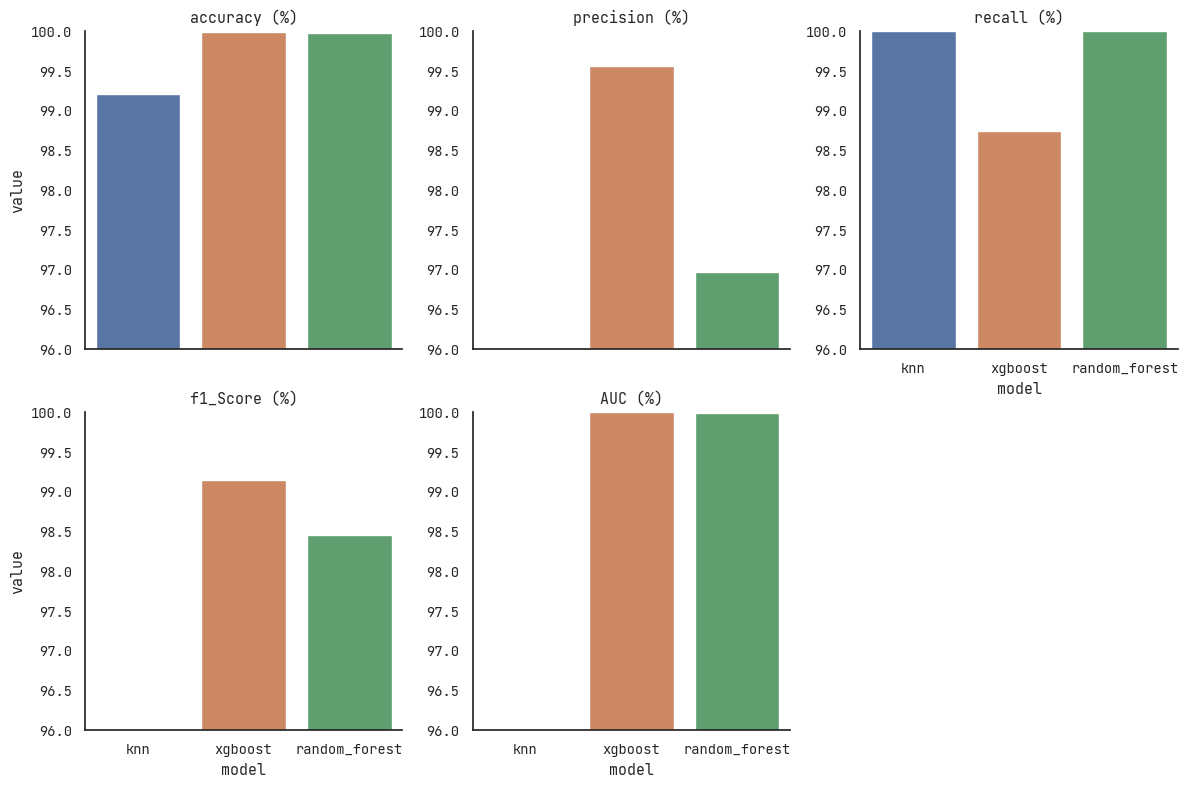

In [6]:
g = sns.FacetGrid(df_melted, col='metric', hue='model', col_wrap=3, height=4, sharey=False)
g.map(sns.barplot, 'model', 'value', order=df['model'])
g.set_axis_labels('model', 'value')

titles = ['accuracy (%)', 'precision (%)', 'recall (%)', 'f1_Score (%)', 'AUC (%)']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set_ylim(96, 100)

plt.tight_layout()
plt.savefig(f'metrics/all_metrics_plot.png')
plt.show()

In [ ]:
for metric in df_melted['metric'].unique():
    # Filter the dataframe for the specific metric
    df_metric = df_melted[df_melted['metric'] == metric]

    # Set up the plotting grid
    g = sns.FacetGrid(df_metric, col='metric', hue='model', col_wrap=1, height=4, sharey=False)
    g.map(sns.barplot, 'model', 'value', order=df['model'])
    g.set_axis_labels('model', 'value')

    # Add title to the plot
    #g.fig.suptitle(f'{metric} (%)', y=1.02)

    # Set y-axis limits
    g.axes.flat[0].set_ylim(95, 100)  # Set ylim to your desired interval

    # Save the plot locally
    plt.savefig(f'metrics/{metric}_plot.png')

    # Close the plot to avoid overlapping plots
    plt.close()

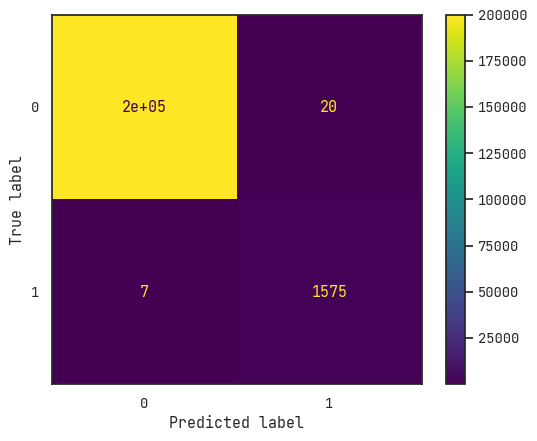

In [16]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.savefig(f'metrics/xgb_confusion_matrix.png')
plt.show()